### Run this line to download the data.

In [10]:
!python data_prep.py

# Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.regression import *

In [2]:
EU_milk = pd.read_pickle('data/eu.pickle')
US_milk = pd.read_pickle('data/us.pickle')
china_milk = pd.read_pickle('data/cn.pickle')
fred_series = pd.read_pickle('data/fred.pickle')

# All data

In [3]:
# Commodities and indicators
fred_list = ['MCOILBRENTEU', 'MCOILWTICO', 'MHHNGSP', 'PBARLUSDM', 'PMAIZMTUSDM', 'PNGASEUUSDM', 'PSOYBUSDM', 'PWHEAMTUSDM', 'IPG32411S', 'A33DNO','PCEC96']
models = ['et']

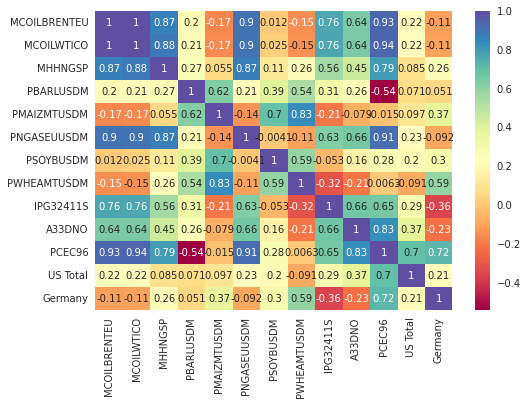

In [7]:
import seaborn as sns

china_milk.name = 'China'
data_all = EU_milk.join(US_milk).join(fred_series).join(china_milk)
dataplot = sns.heatmap(data_all.loc['1992-01-01':'2005-12-31',fred_list + ['US Total','Germany']].corr(), cmap="Spectral", annot=True, annot_kws={'fontsize':10})
plt.savefig('all_fred_corr9205.jpg')

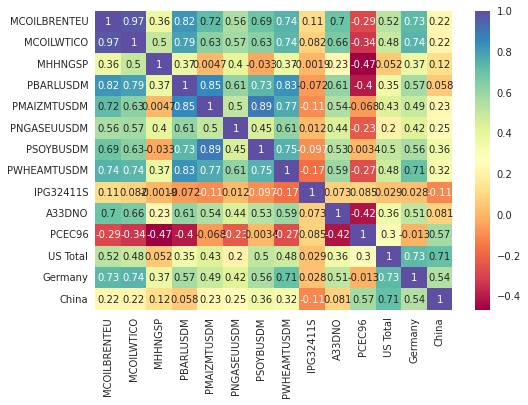

In [12]:
dataplot = sns.heatmap(data_all.loc['2006-01-01':,fred_list + ['US Total','Germany','China']].corr(), cmap="Spectral", annot=True, annot_kws={'fontsize':10})
plt.savefig('all_fred_corr0522.jpg')

# US

## Exploratory Data Analysis

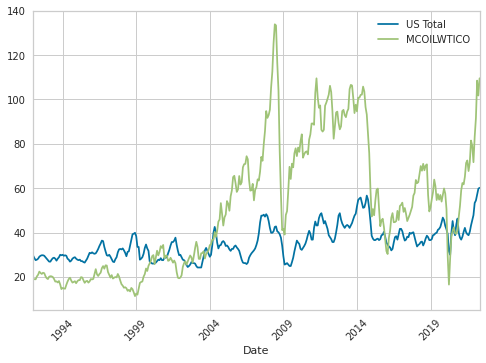

In [16]:
data = US_milk.join(fred_series)
data.loc['1992-01-01':,['US Total', 'MCOILWTICO']].plot()
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.savefig('US_WTI_prices.jpg')
plt.show()

In [7]:
# 10 biggest US states milk producers
US_states = ['California', 'Wisconsin', 'Idaho', 'Texas', 'New York', 'Michigan', 'Minnesota', 'Pennsylvania', 'New Mexico', 'Washington', 'US Total']

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


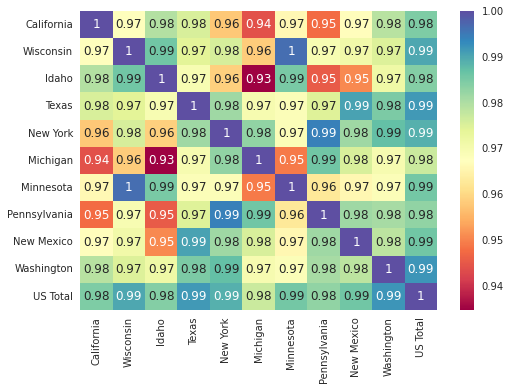

In [8]:

dataplot = sns.heatmap(data[US_states].corr(), cmap="Spectral", annot=True)
plt.savefig('US_states_corr.jpg')

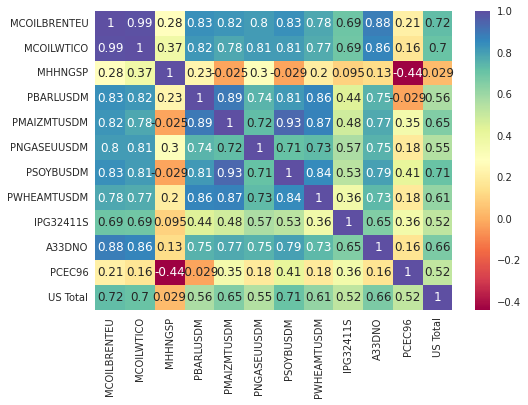

In [9]:
dataplot = sns.heatmap(data[fred_list + ['US Total']].corr(), cmap="Spectral", annot=True)
plt.savefig('US_fred_corr.jpg')

## Regressions
We selected only 5 variables to use for all regression models.
They are:  
* Henry Hub Natural Gas Spot Price (MHHNGSP)
* Global price of Soybeans (PSOYBUSDM)
* Industrial Production: Manufacturing: Non-Durable Goods: Petroleum Refineries (IPG32411S)
* Manufacturers' New Orders: Mining, Oil, and Gas Field Machinery Manufacturing (A33DNO)
* Real Personal Consumption Expenditures (PCEC96)

## Regression from 1992 to 2005

In [17]:
limits = [['1992-01-01','2005-12-31']]
indicators = ['MHHNGSP', 'PSOYBUSDM', 'IPG32411S', 'A33DNO', 'PCEC96']

In [18]:
for date in limits:
    expr = data.loc[date[0]:date[1],indicators + ['US Total']]
    s = setup(expr, target = 'US Total', session_id=123, experiment_name='US milk from 1992 to 2005', remove_multicollinearity=True, multicollinearity_threshold=0.8)
    best = compare_models(fold=5)
    best.get_params()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.4907,4.7139,2.1320,0.6226,0.0657,0.0482,0.1220
rf,Random Forest Regressor,1.7312,5.8864,2.3791,0.5272,0.0731,0.0559,0.1580
gbr,Gradient Boosting Regressor,1.7473,6.4428,2.5041,0.4760,0.0764,0.0560,0.0580
xgboost,Extreme Gradient Boosting,1.7712,6.6307,2.5102,0.4672,0.0778,0.0569,10.7380
ada,AdaBoost Regressor,1.9449,6.5426,2.5456,0.4481,0.0794,0.0641,0.0680
lightgbm,Light Gradient Boosting Machine,2.0773,7.8499,2.7655,0.3628,0.0854,0.0675,0.0400
ridge,Ridge Regression,2.3860,10.1165,3.1434,0.1778,0.0960,0.0767,0.0300
lr,Linear Regression,2.3862,10.1180,3.1437,0.1777,0.0960,0.0767,0.8760
lar,Least Angle Regression,2.3862,10.1180,3.1437,0.1777,0.0960,0.0767,0.0300
en,Elastic Net,2.4319,10.2917,3.1702,0.1628,0.0967,0.0779,0.0280


In [19]:
plot_model(best, save=True)

'Residuals.png'

In [20]:
plot_model(best, plot='feature', save=True)

'Feature Importance.png'

## Regression from 2006 to May 2022

In [21]:
limits = [['2006-01-01','2022-05-31']]

for date in limits:
    expr = data.loc[date[0]:date[1],indicators + ['US Total']]
    s = setup(expr, target = 'US Total', session_id=123, experiment_name='US milk from 2006 to May 2022',remove_multicollinearity=True, multicollinearity_threshold=0.8)
    best = compare_models(fold=5)
    best.get_params()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.3465,9.8472,3.1082,0.7981,0.0768,0.0601,0.1260
xgboost,Extreme Gradient Boosting,2.7744,15.0338,3.8107,0.6949,0.0929,0.0700,5.5200
rf,Random Forest Regressor,2.8627,14.9706,3.8435,0.6853,0.0928,0.0729,0.1660
gbr,Gradient Boosting Regressor,2.8747,15.3205,3.8944,0.6783,0.0936,0.0725,0.0620
lightgbm,Light Gradient Boosting Machine,3.2802,17.1842,4.1050,0.6473,0.1009,0.0845,0.0420
ada,AdaBoost Regressor,3.1437,17.1834,4.1205,0.6435,0.0986,0.0795,0.0840
knn,K Neighbors Regressor,3.4887,20.7064,4.4880,0.5765,0.1088,0.0883,0.0320
dt,Decision Tree Regressor,3.3455,21.6443,4.6039,0.5288,0.1121,0.0854,0.0300
en,Elastic Net,4.5049,32.5307,5.6282,0.3295,0.1335,0.1125,0.0300
lasso,Lasso Regression,4.5167,32.7924,5.6488,0.3258,0.1339,0.1128,0.0360


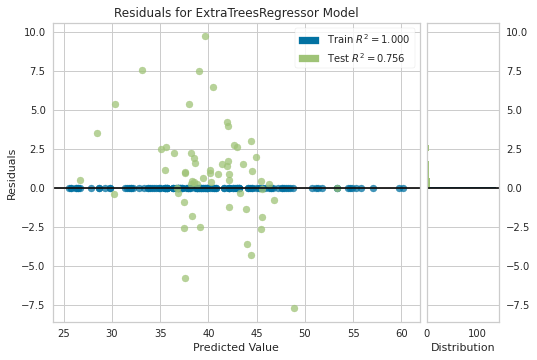

In [22]:
plot_model(best)

In [23]:
plot_model(best, plot='feature', save=True)

'Feature Importance.png'

# EU

## Exploratory Data Analysis

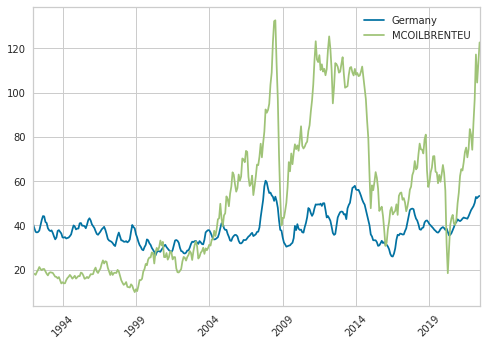

In [24]:
data = EU_milk.join(fred_series)
data.loc['1992-01-01':,['Germany', 'MCOILBRENTEU']].plot()
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.savefig('Germany_Brent_prices.jpg')
plt.show()

In [25]:
EU_countries = ['Germany', 'France', 'Netherlands', 'Italy', 'Poland', 'Ireland', 'Spain', 'Denmark', 'Belgium', 'Austria', 'EU(without UK)']

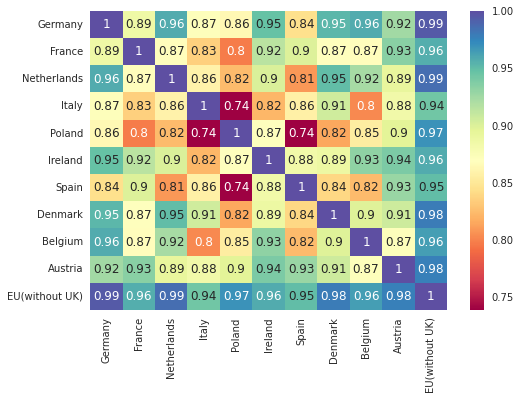

In [12]:
import seaborn as sns
dataplot = sns.heatmap(data[EU_countries].corr(), cmap="Spectral", annot=True)
plt.savefig('EU_states_corr.jpg')

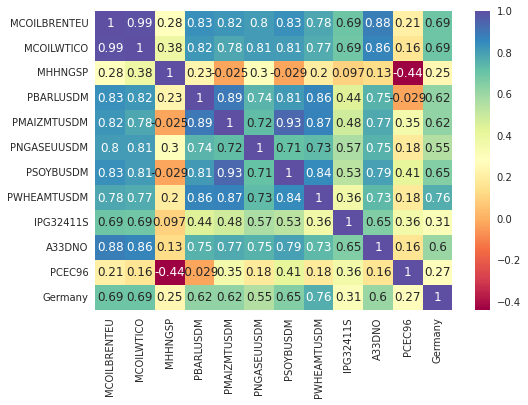

In [13]:
dataplot = sns.heatmap(data[fred_list + ['Germany']].corr(), cmap="Spectral", annot=True)
plt.savefig('Germany_fred_corr.jpg')

## Regression from 1992 to May 2022

In [9]:
limits = [['1992-01-01','2005-12-31']]
indicators = ['PNGASEUUSDM', 'PSOYBUSDM', 'IPG32411S', 'A33DNO', 'PCEC96']

In [26]:
for date in limits:
    expr = data.loc[date[0]:date[1],indicators + ['Germany']]
    s = setup(expr, target = 'Germany', session_id=123, experiment_name='US milk from 1992 to 2005', remove_multicollinearity=True, multicollinearity_threshold=0.8)
    best = compare_models(fold=5)
    best.get_params()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.4516,12.5190,3.4420,0.7938,0.0820,0.0609,0.1220
lightgbm,Light Gradient Boosting Machine,2.9116,15.1352,3.8490,0.7430,0.0930,0.0719,0.0420
ada,AdaBoost Regressor,3.0067,16.0653,3.9029,0.7350,0.0921,0.0740,0.0880
xgboost,Extreme Gradient Boosting,3.0007,16.8041,4.0694,0.7107,0.0994,0.0757,10.4560
gbr,Gradient Boosting Regressor,2.9572,17.9363,4.1286,0.7023,0.0985,0.0731,0.0620
rf,Random Forest Regressor,2.7272,17.6670,4.1280,0.7003,0.0996,0.0687,0.1660
knn,K Neighbors Regressor,3.5000,22.5301,4.5985,0.6307,0.1038,0.0833,0.0320
en,Elastic Net,4.1561,28.2951,5.2358,0.5245,0.1224,0.1014,0.0300
lasso,Lasso Regression,4.1590,28.5053,5.2542,0.5206,0.1225,0.1014,0.0300
br,Bayesian Ridge,4.2037,29.0133,5.3030,0.5105,0.1232,0.1024,0.0520


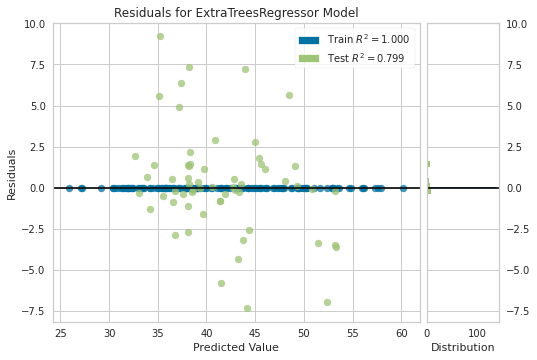

In [27]:
plot_model(best)

In [28]:
plot_model(best, plot='feature', save=True)

'Feature Importance.png'

## Regression from 2006 to May 2022

In [29]:
limits = [['2006-01-01','2022-05-31']]

for date in limits:
    expr = data.loc[date[0]:date[1],indicators + ['Germany']]
    s = setup(expr, target = 'Germany', session_id=123, experiment_name='US milk from 2006 to May 2022',  remove_multicollinearity=True, multicollinearity_threshold=0.8)
    best = compare_models(fold=5)
    best.get_params()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.4516,12.5190,3.4420,0.7938,0.0820,0.0609,0.1140
lightgbm,Light Gradient Boosting Machine,2.9116,15.1352,3.8490,0.7430,0.0930,0.0719,0.0360
ada,AdaBoost Regressor,3.0067,16.0653,3.9029,0.7350,0.0921,0.0740,0.0740
xgboost,Extreme Gradient Boosting,3.0007,16.8041,4.0694,0.7107,0.0994,0.0757,6.1600
gbr,Gradient Boosting Regressor,2.9572,17.9363,4.1286,0.7023,0.0985,0.0731,0.0520
rf,Random Forest Regressor,2.7272,17.6670,4.1280,0.7003,0.0996,0.0687,0.1480
knn,K Neighbors Regressor,3.5000,22.5301,4.5985,0.6307,0.1038,0.0833,0.0260
en,Elastic Net,4.1561,28.2951,5.2358,0.5245,0.1224,0.1014,0.0240
lasso,Lasso Regression,4.1590,28.5053,5.2542,0.5206,0.1225,0.1014,0.0240
br,Bayesian Ridge,4.2037,29.0133,5.3030,0.5105,0.1232,0.1024,0.0240


In [30]:
plot_model(best, plot='feature', save=True)

'Feature Importance.png'

# China

## Exploratory Data Analysis

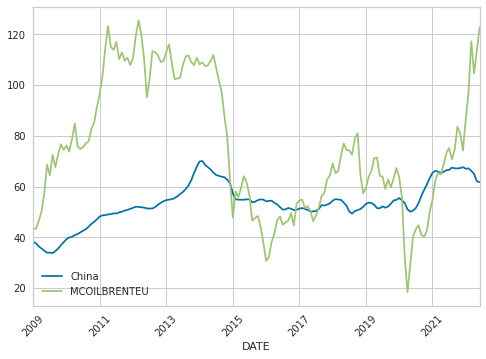

In [14]:
china_milk.name = 'China'
data = fred_series.join(china_milk)
data.loc['2009-01-01':,['China', 'MCOILBRENTEU']].plot()
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.savefig('China_Brent_prices.jpg')
plt.show()

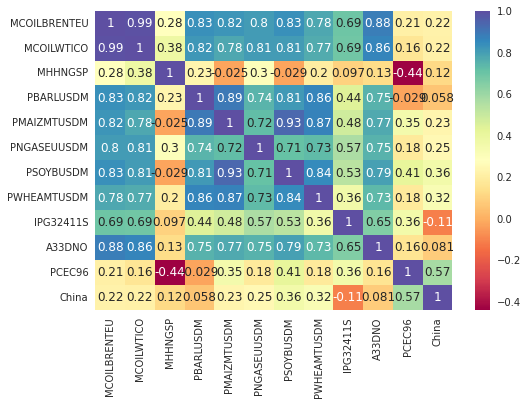

In [15]:
dataplot = sns.heatmap(data[fred_list + ['China']].corr(), cmap="Spectral", annot=True)
plt.savefig('China_fred_corr.jpg')

## Regression from 2009 to 2022

In [17]:
limits = [['2009-01-01','2022-05-31']]

for date in limits:
    expr = data.loc[date[0]:date[1],indicators + ['China']]
    s = setup(expr, target = 'China', session_id=123, experiment_name='US milk from 2009 to May 2022')
    best = compare_models(fold=5)
    best.get_params()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.9847,2.4077,1.4253,0.9658,0.0252,0.0182,0.1280
gbr,Gradient Boosting Regressor,1.1069,2.5609,1.5497,0.9590,0.0275,0.0206,0.0560
xgboost,Extreme Gradient Boosting,1.2357,3.9039,1.8454,0.9436,0.0327,0.0228,13.4620
rf,Random Forest Regressor,1.4478,5.7818,2.1929,0.9200,0.0384,0.0263,0.1680
ada,AdaBoost Regressor,1.6229,5.3510,2.2103,0.9173,0.0404,0.0305,0.0600
lightgbm,Light Gradient Boosting Machine,2.0663,8.0497,2.7879,0.8676,0.0573,0.0416,0.0380
dt,Decision Tree Regressor,1.7911,10.2840,3.1318,0.8322,0.0531,0.0328,0.0300
knn,K Neighbors Regressor,2.2299,11.9421,3.2708,0.8084,0.0609,0.0424,0.0320
lasso,Lasso Regression,3.7594,24.2844,4.8303,0.5784,0.0919,0.0723,0.0280
en,Elastic Net,3.7554,24.2289,4.8295,0.5783,0.0919,0.0722,0.0280


In [12]:
plot_model(best, save=True)

'Residuals.png'

In [11]:
plot_model(best, plot='feature', save=True)

'Feature Importance.png'

# Oil

## Regression from 1992 to 2005

In [36]:
limits = [['1992-01-01','2022-05-31']]

for date in limits:
    expr = data.loc[date[0]:date[1],indicators + ['MCOILBRENTEU']]
    s = setup(expr, target = 'MCOILBRENTEU', session_id=123, experiment_name='Oil from 1992 to 2005',remove_multicollinearity=True, multicollinearity_threshold=0.8)
    best = compare_models(fold=5)
    best.get_params()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,4.2428,41.2497,6.2616,0.9564,0.1225,0.0955,0.1300
rf,Random Forest Regressor,5.1236,64.5787,7.7217,0.9326,0.1424,0.1112,0.1780
gbr,Gradient Boosting Regressor,5.4585,67.4207,8.0892,0.9296,0.1632,0.1237,0.0720
xgboost,Extreme Gradient Boosting,5.3435,68.5153,8.0818,0.9283,0.1481,0.1149,3.1900
ada,AdaBoost Regressor,6.8278,85.5000,9.1531,0.9109,0.2129,0.1841,0.0920
lightgbm,Light Gradient Boosting Machine,6.0363,90.2139,9.2471,0.9048,0.1764,0.1357,0.0760
dt,Decision Tree Regressor,6.1931,94.6013,9.5259,0.8982,0.1714,0.1271,0.0300
knn,K Neighbors Regressor,6.3818,105.3044,9.7392,0.8912,0.2030,0.1584,0.0320
lar,Least Angle Regression,8.8977,149.1245,12.1024,0.8449,0.2500,0.2170,0.0300
ridge,Ridge Regression,8.8974,149.1222,12.1022,0.8449,0.2499,0.2170,0.0300


In [37]:
plot_model(best, plot='feature', save=True)

'Feature Importance.png'

## Regression from 2006 to May 2022

In [5]:
limits = [['2006-01-01','2022-05-31']]

for date in limits:
    expr = data.loc[date[0]:date[1],indicators + ['MCOILBRENTEU']]
    s = setup(expr, target = 'MCOILBRENTEU', session_id=123, experiment_name='Oil from 2006 to May 2022',remove_multicollinearity=True, multicollinearity_threshold=0.8)
    best = compare_models(fold=5)
    best.get_params()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,7.6102,111.0957,10.1039,0.8430,0.1354,0.1073,0.2360
rf,Random Forest Regressor,8.7199,140.0389,11.5206,0.7944,0.1590,0.1266,0.2920
gbr,Gradient Boosting Regressor,9.2232,152.1677,12.0592,0.7749,0.1651,0.1314,0.1240
lightgbm,Light Gradient Boosting Machine,8.9042,157.8384,12.0685,0.7740,0.1652,0.1278,0.0720
knn,K Neighbors Regressor,9.2995,174.7167,12.7164,0.7532,0.1683,0.1330,0.0720
xgboost,Extreme Gradient Boosting,9.5750,163.1003,12.5965,0.7525,0.1749,0.1369,2.8200
ada,AdaBoost Regressor,9.7681,170.3616,12.8377,0.7452,0.1756,0.1404,0.1680
en,Elastic Net,11.4501,221.9827,14.6405,0.6700,0.2096,0.1716,0.0560
lasso,Lasso Regression,11.5622,222.6719,14.6615,0.6697,0.2080,0.1718,0.0560
ridge,Ridge Regression,11.6449,223.6872,14.6979,0.6685,0.2068,0.1718,0.0560


In [9]:
plot_model(best, save=True)

'Residuals.png'

In [10]:
plot_model(best, plot='feature', save=True)

'Feature Importance.png'